In [46]:
import pandas as pd
import json, re
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
%matplotlib inline  
import scipy

ImportError: No module named scipy

In [3]:
with open('typing-data.json', 'r') as data_file:   
    data = json.load(data_file)
type_df = json_normalize(data['us:auto']['data'])


In [4]:
cols = type_df.columns.tolist()
cols = cols[83:][::-1] + cols[0:2] + cols[2:83] 
cols = cols[0:7] + cols[76:] + cols[7:76]
type_df = type_df[cols]

cols = type_df.columns.tolist()

for ix, col in enumerate(cols):
  
    if re.match('.*.m$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_missed"
   
    elif re.match('.*.t$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_time"
    
    elif re.match('.*[0-9].h$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_hit" 

cols[7] = 'Space_hit'
cols[8] = 'Space_missed'
cols[9] = 'Space_time'

old_cols = type_df.columns.tolist()
names = dict(zip(old_cols, cols))
type_df.rename(columns=names, inplace=True)
type_df.to_csv('typing-data_formatted.csv', index = False)

Index([      u'timeStamp',            u'time',           u'speed',
                 u'score',          u'length',      u'complexity',
                u'errors',  u'histogram.32.h',  u'histogram.32.m',
        u'histogram.32.t',  u'histogram.97.h',  u'histogram.97.m',
        u'histogram.97.t',  u'histogram.98.h',  u'histogram.98.m',
        u'histogram.98.t',  u'histogram.99.h',  u'histogram.99.m',
        u'histogram.99.t', u'histogram.100.h', u'histogram.100.m',
       u'histogram.100.t', u'histogram.101.h', u'histogram.101.m',
       u'histogram.101.t', u'histogram.102.h', u'histogram.102.m',
       u'histogram.102.t', u'histogram.103.h', u'histogram.103.m',
       u'histogram.103.t', u'histogram.104.h', u'histogram.104.m',
       u'histogram.104.t', u'histogram.105.h', u'histogram.105.m',
       u'histogram.105.t', u'histogram.106.h', u'histogram.106.m',
       u'histogram.106.t', u'histogram.107.h', u'histogram.107.m',
       u'histogram.107.t', u'histogram.108.h', u'histogram.108

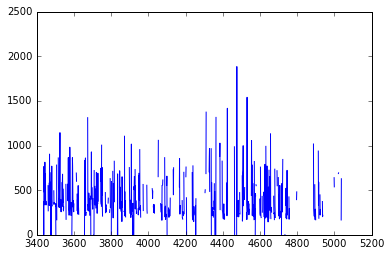

In [56]:

V_ratio = pd.Series(type_df.V_missed / type_df.V_hit, name = "V_miss_freq")

averaged = V_ratio.rolling(2, center=False).mean()
# interpolated = averaged.interpolate(method = 'cubic')

plt.plot(type_df.V_time)



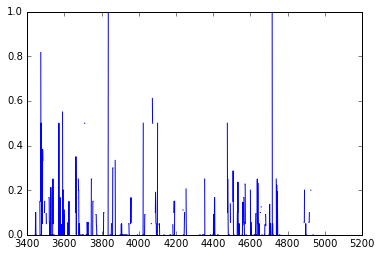

In [57]:
plt.plot(averaged)
plt.show()




